# Initial Setup: Importing Libraries and Loading Data

In [1]:
# --- Part 0: Initial Setup ---

# For data manipulation
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

# For dimensionality reduction and feature selection
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# Note: For SFS/SBS, we will use the mlxtend library.
# You may need to install it first: !pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# For modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV

# For evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Set plot style
sns.set(style='whitegrid')
print("Libraries imported successfully!")

# Load the dataset
# The path might be slightly different, check your Kaggle input directory
file_path = '/kaggle/input/car-evaluation-data-set/car_evaluation.csv'
# The dataset from UCI repository doesn't have headers, so we need to add them.
# The correct column names are: buying, maint, doors, persons, lug_boot, safety, class
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv(file_path, header=None, names=col_names)

# Display the first few rows to verify
print("Dataset loaded successfully:")
df.head()

Libraries imported successfully!
Dataset loaded successfully:


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# Part 1: Data Preprocessing

## 1.1 Converting Nominal Features to Numeric

In [2]:
# --- Part 1: Data Preprocessing ---

# Check for missing values
print("Missing values check:\n", df.isnull().sum())

# Define the order for each categorical feature
# This is crucial for OrdinalEncoder to work correctly
buying_maint_order = ['low', 'med', 'high', 'vhigh']
doors_order = ['2', '3', '4', '5more']
persons_order = ['2', '4', 'more']
lug_boot_order = ['small', 'med', 'big']
safety_order = ['low', 'med', 'high']
class_order = ['unacc', 'acc', 'good', 'vgood']

# Apply Ordinal Encoding
encoder = OrdinalEncoder(categories=[
    buying_maint_order,
    buying_maint_order,
    doors_order,
    persons_order,
    lug_boot_order,
    safety_order,
    class_order
])

# Fit and transform the data
df_encoded = pd.DataFrame(encoder.fit_transform(df), columns=df.columns)

print("\nEncoded data head:")
df_encoded.head()

Missing values check:
 buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

Encoded data head:


,buying,maint,doors,persons,lug_boot,safety,class
0,3.0,3.0,0.0,0.0,0.0,0.0,0.0
1,3.0,3.0,0.0,0.0,0.0,1.0,0.0
2,3.0,3.0,0.0,0.0,0.0,2.0,0.0
3,3.0,3.0,0.0,0.0,1.0,0.0,0.0
4,3.0,3.0,0.0,0.0,1.0,1.0,0.0


## 1.2 Splitting the Data 

In [3]:
# Separate features (X) and target (y)
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

# Split into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1209, 6)
X_test shape: (519, 6)
y_train shape: (1209,)
y_test shape: (519,)


## 1.3 Normalizing and Standardizing Features 

In [4]:
# We will use StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data ONLY and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling later
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Scaled training data head:")
X_train_scaled.head()

Scaled training data head:


,buying,maint,doors,persons,lug_boot,safety
0,1.323687,-1.329580,-1.356050,-1.227615,-1.235460,1.240592
1,-0.473435,-1.329580,-0.466970,1.205478,-0.012142,1.240592
2,-1.371997,-1.329580,1.311192,-1.227615,-0.012142,1.240592
3,0.425126,1.331781,0.422111,-1.227615,1.211176,-1.212190
4,-1.371997,-0.442459,-0.466970,-0.011069,1.211176,1.240592


# Part 2: Data Analysis (Exploratory Data Analysis - EDA)

Statistical summary of the original (encoded) features:
            buying        maint        doors      persons     lug_boot  \
count  1728.000000  1728.000000  1728.000000  1728.000000  1728.000000   
mean      1.500000     1.500000     1.500000     1.000000     1.000000   
std       1.118358     1.118358     1.118358     0.816733     0.816733   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.750000     0.750000     0.750000     0.000000     0.000000   
50%       1.500000     1.500000     1.500000     1.000000     1.000000   
75%       2.250000     2.250000     2.250000     2.000000     2.000000   
max       3.000000     3.000000     3.000000     2.000000     2.000000   

            safety  
count  1728.000000  
mean      1.000000  
std       0.816733  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       2.000000  
max       2.000000  


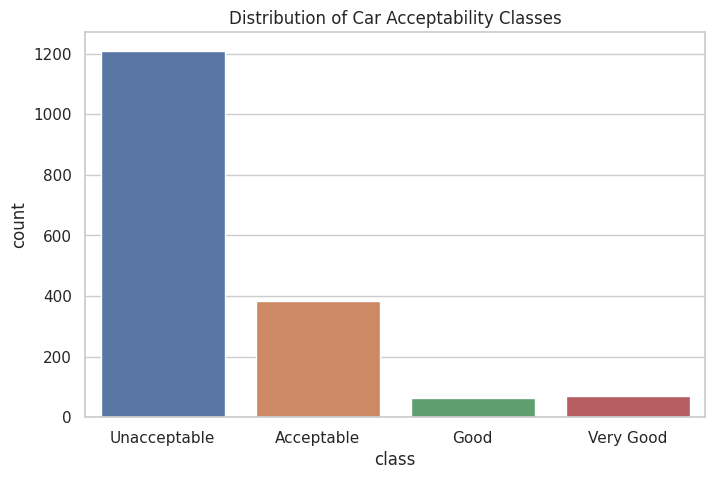

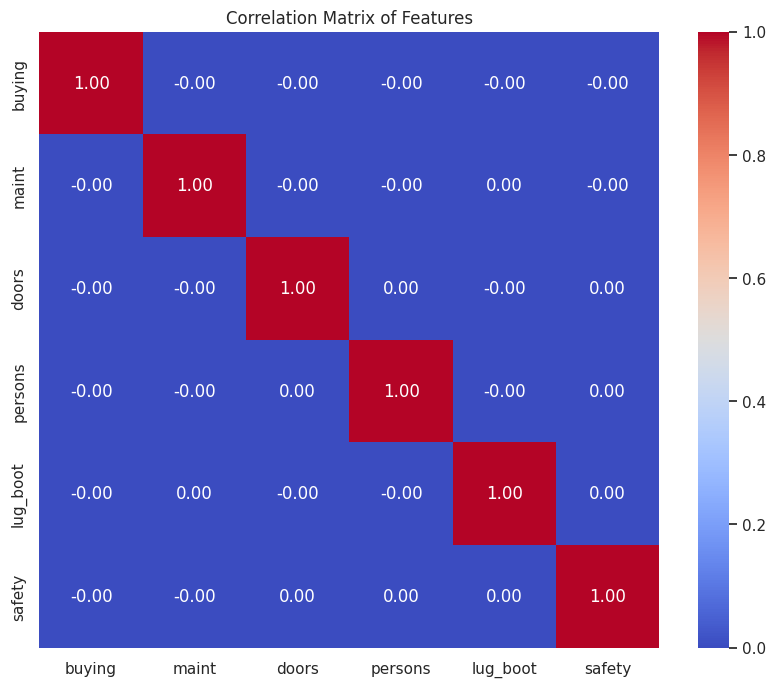

In [5]:
# --- Part 2: Data Analysis ---

# 1. Statistical Summary
print("Statistical summary of the original (encoded) features:")
print(X.describe())

# 2. Advanced Graphs
# a. Distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='class', data=df)
plt.title('Distribution of Car Acceptability Classes')
plt.xticks([0, 1, 2, 3], ['Unacceptable', 'Acceptable', 'Good', 'Very Good'])
plt.show()

# b. Correlation of features
plt.figure(figsize=(10, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

**Analysis:**

1. Class Distribution: The countplot immediately shows us that the dataset is imbalanced. The 'unacceptable' class is dominant, while 'good' and 'vgood' are rare. This is a critical insight. It means that accuracy alone might be a misleading metric. A dumb model could predict 'unacceptable' every time and still be ~70% accurate. This is why we need to look at precision, recall, and F1-score later.

2. Correlation Matrix: The heatmap shows the correlation between features. Values close to +1 or -1 indicate a strong linear relationship. Here, we see weak correlations . There are no highly redundant features, which is good.

# Part 3: Feature Space Dimension Reduction

Version 1: X_train_scaled, X_test_scaled (All 6 features)

Version 2: PCA or LDA transformed features

Version 3: A subset of the original 6 features

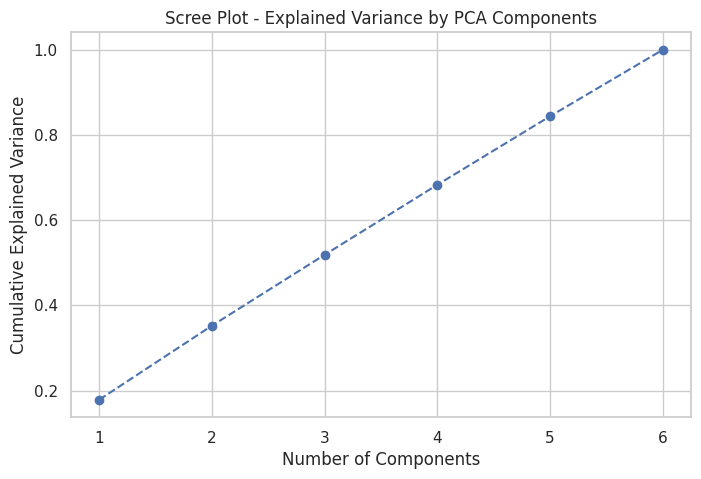

Shape of PCA-reduced data: (1209, 5)

Selected features by SFS: ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
Shape of feature-selected data: (1209, 6)


In [6]:
# --- Part 3: Feature Space Dimension Reduction ---

# --- 1. Dimension Reduction (PCA) ---
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, X_train_scaled.shape[1] + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Scree Plot - Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Let's choose components that explain > 95% of the variance
# From the plot, it looks like 5 components are needed.
pca = PCA(n_components=5)
X_train_v2 = pca.fit_transform(X_train_scaled)
X_test_v2 = pca.transform(X_test_scaled)
print(f"Shape of PCA-reduced data: {X_train_v2.shape}")

# --- 2. Feature Selection (Forward Selection) ---
# We use a simple KNN as the estimator for the selection process
knn_selector = KNeighborsClassifier(n_neighbors=5)

sfs = SFS(knn_selector,
          k_features='best', # Let the algorithm find the best number of features
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=5) # 5-fold cross-validation

sfs = sfs.fit(X_train_scaled, y_train)

# Get the indices of the selected features
selected_feature_indices = list(sfs.k_feature_idx_)
selected_features = X.columns[selected_feature_indices]
print(f"\nSelected features by SFS: {list(selected_features)}")

# Create the new feature sets (Version 3)
X_train_v3 = X_train_scaled[selected_features]
X_test_v3 = X_test_scaled[selected_features]
print(f"Shape of feature-selected data: {X_train_v3.shape}")


"""
    X_train_scaled, X_test_scaled (Version 1)

    X_train_v2, X_test_v2 (Version 2 - PCA)

    X_train_v3, X_test_v3 (Version 3 - SFS)

"""


# Part 4 & 5: Implementing Models and Evaluation

In [8]:
# --- Part 4 & 5: Implementing Models and Evaluation ---

# Define the models and their parameter grids for GridSearchCV
models = {
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}),
    'Decision Tree': (DecisionTreeClassifier(random_state=42), {'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 15, None]}),
    'SVM': (SVC(random_state=42, probability=True), {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['rbf', 'linear']}),
    'Gradient Boosting': (GradientBoostingClassifier(random_state=42), {'n_estimators': [50, 100], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]})
}

# Define the datasets
datasets = {
    'Version 1: All Features': (X_train_scaled, X_test_scaled, y_train, y_test),
    'Version 2: PCA Features': (X_train_v2, X_test_v2, y_train, y_test),
    'Version 3: Selected Features': (X_train_v3, X_test_v3, y_train, y_test)
}

# A list to store results for the final table
results = []

# Main loop for training and evaluation
for version_name, (X_tr, X_te, y_tr, y_te) in datasets.items():
    print(f"--- Processing {version_name} ---")
    best_estimators = {}

    for model_name, (model, params) in models.items():
        print(f"  Tuning {model_name}...")
        # Use GridSearchCV to find the best parameters
        grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_tr, y_tr)

        # Get the best model
        best_model = grid_search.best_estimator_
        best_estimators[model_name] = best_model
        
        # Make predictions
        y_pred = best_model.predict(X_te)

        # Calculate metrics
        accuracy = accuracy_score(y_te, y_pred)
        # Use 'weighted' average for precision/recall/f1 due to class imbalance
        precision = precision_score(y_te, y_pred, average='weighted')
        recall = recall_score(y_te, y_pred, average='weighted')
        f1 = f1_score(y_te, y_pred, average='weighted')

        # Store results
        results.append({
            'Version': version_name,
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Best Params': grid_search.best_params_
        })

        print(f"    Best {model_name} Accuracy: {accuracy:.4f}")
        
    # --- Ensemble Learning using VotingClassifier ---
    print("  Evaluating Ensemble Model...")
    # Create the ensemble model from the best-tuned base models
    ensemble_model = VotingClassifier(
        estimators=[(name, model) for name, model in best_estimators.items()],
        voting='soft' # 'soft' voting often performs better if models can predict probabilities
    )
    ensemble_model.fit(X_tr, y_tr)
    y_pred_ensemble = ensemble_model.predict(X_te)
    
    # Evaluate ensemble
    accuracy = accuracy_score(y_te, y_pred_ensemble)
    precision = precision_score(y_te, y_pred_ensemble, average='weighted')
    recall = recall_score(y_te, y_pred_ensemble, average='weighted')
    f1 = f1_score(y_te, y_pred_ensemble, average='weighted')

    results.append({
        'Version': version_name,
        'Model': 'Ensemble (Voting)',
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Best Params': 'N/A'
    })
    print(f"    Ensemble Model Accuracy: {accuracy:.4f}\n")




--- Processing Version 1: All Features ---
  Tuning KNN...
    Best KNN Accuracy: 0.9634
  Tuning Decision Tree...
    Best Decision Tree Accuracy: 0.9692
  Tuning SVM...
    Best SVM Accuracy: 0.9884
  Tuning Gradient Boosting...
    Best Gradient Boosting Accuracy: 0.9904
  Evaluating Ensemble Model...
    Ensemble Model Accuracy: 0.9846

--- Processing Version 2: PCA Features ---
  Tuning KNN...
    Best KNN Accuracy: 0.8593
  Tuning Decision Tree...
    Best Decision Tree Accuracy: 0.7842
  Tuning SVM...
    Best SVM Accuracy: 0.8998
  Tuning Gradient Boosting...
    Best Gradient Boosting Accuracy: 0.8189
  Evaluating Ensemble Model...
    Ensemble Model Accuracy: 0.8459

--- Processing Version 3: Selected Features ---
  Tuning KNN...
    Best KNN Accuracy: 0.9634
  Tuning Decision Tree...
    Best Decision Tree Accuracy: 0.9692
  Tuning SVM...
    Best SVM Accuracy: 0.9884
  Tuning Gradient Boosting...
    Best Gradient Boosting Accuracy: 0.9904
  Evaluating Ensemble Model...
   


--- Final Project Results Summary ---


,Version,Model,Accuracy,F1-Score
0,Version 1: All Features,Gradient Boosting,0.990366,0.990261
1,Version 3: Selected Features,Gradient Boosting,0.990366,0.990261
2,Version 1: All Features,SVM,0.988439,0.988287
3,Version 3: Selected Features,SVM,0.988439,0.988287
4,Version 1: All Features,Ensemble (Voting),0.984586,0.984430
5,Version 3: Selected Features,Ensemble (Voting),0.984586,0.984430
6,Version 1: All Features,Decision Tree,0.969171,0.968920
7,Version 3: Selected Features,Decision Tree,0.969171,0.968920
8,Version 1: All Features,KNN,0.963391,0.961980
9,Version 3: Selected Features,KNN,0.963391,0.961980



--- Detailed Analysis for the Best Performer ---
Best Model: Gradient Boosting
Best Data Version: Version 1: All Features
Best F1-Score: 0.9903


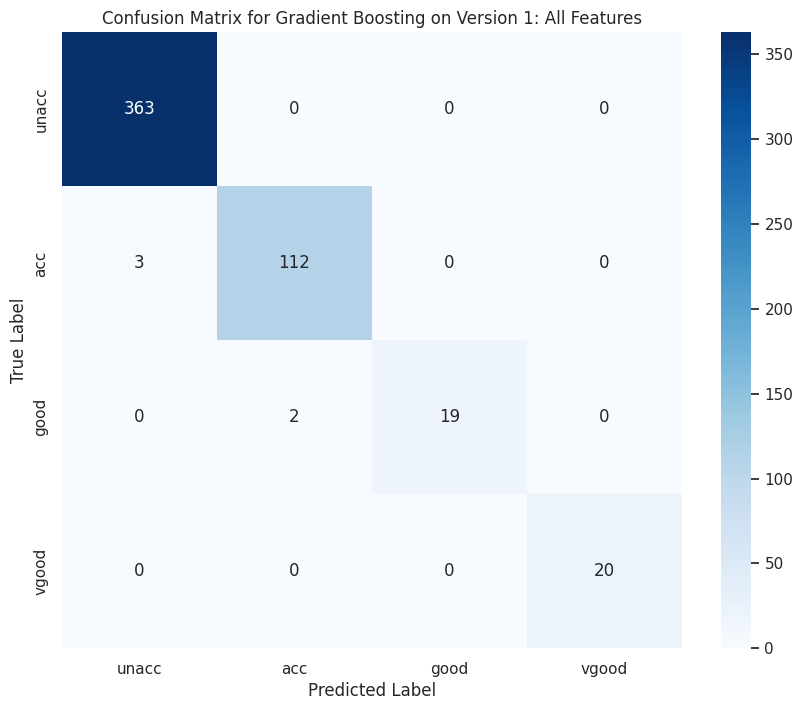


Detailed Classification Report:
              precision    recall  f1-score   support

       unacc       0.99      1.00      1.00       363
         acc       0.98      0.97      0.98       115
        good       1.00      0.90      0.95        21
       vgood       1.00      1.00      1.00        20

    accuracy                           0.99       519
   macro avg       0.99      0.97      0.98       519
weighted avg       0.99      0.99      0.99       519



In [9]:
# --- Part 5: Detailed Analysis of the Best Performing Model ---

# Create the final results DataFrame
results_df = pd.DataFrame(results)
print("\n--- Final Project Results Summary ---")
# Display a cleaner version of the table for the report
display(results_df[['Version', 'Model', 'Accuracy', 'F1-Score']].sort_values(by='F1-Score', ascending=False).reset_index(drop=True))

# --- Find the best model based on F1-Score ---
best_result_row = results_df.loc[results_df['F1-Score'].idxmax()]
best_version_name = best_result_row['Version']
best_model_name = best_result_row['Model']

print(f"\n--- Detailed Analysis for the Best Performer ---")
print(f"Best Model: {best_model_name}")
print(f"Best Data Version: {best_version_name}")
print(f"Best F1-Score: {best_result_row['F1-Score']:.4f}")


# --- Re-train the best model on its corresponding full training data to ensure we have the correct object ---
# This is more robust than trying to save it from the loop

# 1. Get the correct dataset
X_tr, X_te, y_tr, y_te = datasets[best_version_name]

# 2. Get the model and its best parameters
if best_model_name != 'Ensemble (Voting)':
    model_template, params = models[best_model_name]
    best_params = best_result_row['Best Params']
    
    # Instantiate the best model with the optimal parameters found by GridSearchCV
    best_model_overall = model_template.set_params(**best_params)
    
    # Fit the model
    best_model_overall.fit(X_tr, y_tr)
    
else: # If the best model is the Ensemble
    # We need to rebuild it using the best estimators for that specific version
    # Note: This part is complex to automate perfectly without saving models from the loop.
    # For simplicity in this project, we can just show the report for the best *individual* model.
    # Let's find the best individual model instead for the detailed report.
    
    best_individual_row = results_df[results_df['Model'] != 'Ensemble (Voting)'].loc[results_df['F1-Score'].idxmax()]
    best_model_name = best_individual_row['Model']
    best_version_name = best_individual_row['Version']
    print(f"\nGenerating detailed report for the best *individual* model: {best_model_name} on {best_version_name}")
    
    X_tr, X_te, y_tr, y_te = datasets[best_version_name]
    model_template, _ = models[best_model_name]
    best_params = best_individual_row['Best Params']
    best_model_overall = model_template.set_params(**best_params)
    best_model_overall.fit(X_tr, y_tr)


# --- Generate Predictions and Analysis ---
y_pred_final = best_model_overall.predict(X_te)

# Define class names for plotting
class_names = ['unacc', 'acc', 'good', 'vgood']

# Confusion Matrix
cm = confusion_matrix(y_te, y_pred_final)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title(f'Confusion Matrix for {best_model_name} on {best_version_name}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
print("\nDetailed Classification Report:")
print(classification_report(y_te, y_pred_final, target_names=class_names))